In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.drop(columns = ['Id'], inplace =True)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
import seaborn as sns

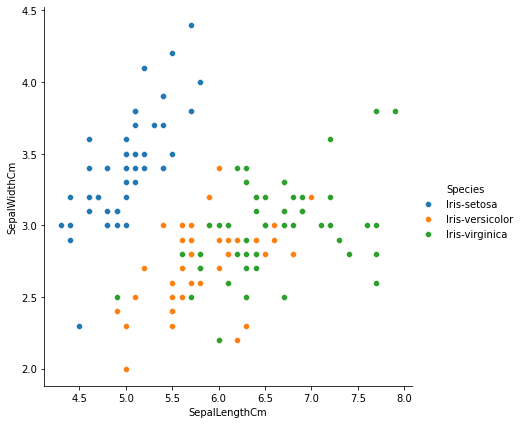

In [6]:
sns.FacetGrid(iris, hue = "Species", size = 6).map(sns.scatterplot,"SepalLengthCm", "SepalWidthCm").add_legend()


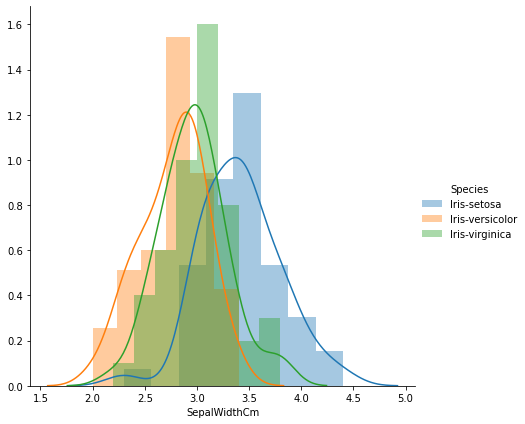

In [7]:
sns.FacetGrid(iris, hue = "Species", size = 6).map(sns.distplot,"SepalWidthCm").add_legend()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
iris.shape

(150, 5)

In [10]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [11]:
train_x = train.loc[:, train.columns !='Species']

test_x = test.loc[:, test.columns !='Species']


In [12]:

train_y = train.loc[:, train.columns =='Species']
test_y = test.loc[:, test.columns =='Species']

In [13]:


from sklearn.metrics import accuracy_score


In [14]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(train_x, train_y)
predictions = model_svm.predict(test_x)
print(accuracy_score(predictions, test_y))

0.9111111111111111


In [15]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print( accuracy_score(prediction, test_y))

0.9333333333333333


In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print( accuracy_score(prediction, test_y))

0.9111111111111111


In [17]:
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier()  
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print( accuracy_score(prediction, test_y))

0.9555555555555556


In [18]:
import matplotlib.pyplot as plt

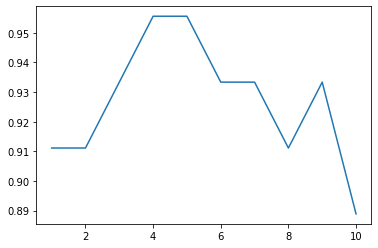

In [19]:
import warnings 

warnings.filterwarnings('ignore')

a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    a = a.append(pd.Series(accuracy_score(prediction, test_y)))

plt.plot(a_index, a)